In [1]:
!pip install yfinance


# Equities (and other assets) vs the S&P 500
The goal of this project is to import data from an online source and process the data using various python libraries. Your group will choose five distinct equities or assets in different classes. A regression analysis on each of the asset against the S&P 500 will determine if there is any correlation. Submit the final project as a single Jupyter notebook file (.ipynb).




 

### Collecting Data
- Choose five distinct equities or assets (oil, gold, bonds, currency pairs, bitcoins, etc…). Verify there is data available to import from Quandl, Alpha Vantage or Yahoo Finance.
- Import daily prices (adj closing or spot) for all five assets. Use 1/1/2022 as the start date and 12/31/2022 as the end date. Display the first 5 rows and the total count for each asset.
- Import daily prices for the S&P 500. Use 1/1/2022 as the start date and 12/31/2022 as the end date. Display the first 5 rows and the total count of the S&P.

In [2]:
#import liberies
import yfinance as yf
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np

In [3]:


# Download historical data for Apple stock, gold prices, Bitcoin, crude oil, and the Euro/US Dollar exchange rate
aapl = yf.download("AAPL", start="2022-01-01", end="2022-12-31")
gold = yf.download("GC=F", start="2022-01-01", end="2022-12-31")
btc = yf.download("BTC-USD", start="2022-01-01", end="2022-12-31")
oil = yf.download("CL=F", start="2022-01-01", end="2022-12-31")
eurusd = yf.download("EURUSD=X", start="2022-01-01", end="2022-12-31")

# Print the first 5 rows of the Apple stock data
print('\n_________________________\n apple stock \n_________________________\n')
print(aapl.head())

# Print the first 5 rows of the gold data
print('\n_________________________\n gold\n_________________________\n')
print(gold.head())

# Print the first 5 rows of the Bitcoin data
print('\n_________________________\n bitcoin\n_________________________\n')
print(btc.head())

# Print the first 5 rows of the crude oil data

print('\n_________________________\n oil\n_________________________\n')
print(oil.head())

# Print the first 5 rows of the Euro/US Dollar exchange rate data

print('\n_________________________\n euro\n_________________________\n')
print(eurusd.head())

#total count
print(f'Total number of trading days for aaple: {len(aapl)}\n')
print(f'Total number of trading days for gold: {len(gold)}\n')
print(f'Total number of trading days for bitcoin: {len(btc)}\n')
print(f'Total number of trading days for oil: {len(oil)}\n')
print(f'Total number of trading days for euro: {len(eurusd)}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

_________________________
 apple stock 
_________________________

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.434296   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.144302   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.405685   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.510956   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.679459   

               Volume  
Date                   
2022-01-03  10448790

In [4]:
# Download the S&P 500 index data
spy = yf.download('^GSPC', start='2022-01-01', end='2022-12-31', auto_adjust=True)

# Print the first five rows of the data
print(spy.head())

# Get the total number of trading days
num_trading_days = len(spy)

# Print the result
print(f'\n----------------------------------------------------------\n Total number of trading days for S&P 500 in 2022: {num_trading_days}')


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close      Volume
Date                                                                      
2022-01-03  4778.140137  4796.640137  4758.169922  4796.560059  3831020000
2022-01-04  4804.509766  4818.620117  4774.270020  4793.540039  4683170000
2022-01-05  4787.990234  4797.700195  4699.439941  4700.580078  4887960000
2022-01-06  4693.390137  4725.009766  4671.259766  4696.049805  4295280000
2022-01-07  4697.660156  4707.950195  4662.740234  4677.029785  4181510000

----------------------------------------------------------
 Total number of trading days for S&P 500 in 2022: 251




### Processing Data

- Calculate daily % change (adj closing or spot) for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.
- Plot the daily % change (adj closing or spot) data using a bar graph for each asset.
- Calculate and display the mean, standard deviation, variance, min, and max for each set of data.

In [5]:
# Calculate daily percentage change for Apple stock
aapl_daily_return = aapl['Close'].pct_change()

# Calculate daily percentage change for gold prices
gold_daily_return = gold['Close'].pct_change()

# Calculate daily percentage change for Bitcoin
btc_daily_return = btc['Close'].pct_change()

# Calculate daily percentage change for crude oil
oil_daily_return = oil['Close'].pct_change()

# Calculate daily percentage change for Euro/US Dollar exchange rate
eurusd_daily_return = eurusd['Close'].pct_change()

# Calculate daily percentage change for the S&P 500 index
spy_daily_return = spy['Close'].pct_change()

# Print the first 5 rows of each dataset
print('AAPL daily return:')
print(aapl_daily_return.head())
print('Gold daily return:')
print(gold_daily_return.head())
print('BTC daily return:')
print(btc_daily_return.head())
print('Oil daily return:')
print(oil_daily_return.head())
print('EUR/USD daily return:')
print(eurusd_daily_return.head())
print('S&P 500 daily return:')
print(spy_daily_return.head())

# Print the total count for each dataset
print('\nAAPL total count:', len(aapl_daily_return))
print('Gold total count:', len(gold_daily_return))
print('BTC total count:', len(btc_daily_return))
print('Oil total count:', len(oil_daily_return))
print('EUR/USD total count:', len(eurusd_daily_return))
print('S&P 500 total count:', len(spy_daily_return))


AAPL daily return:
Date
2022-01-03         NaN
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
Name: Close, dtype: float64
Gold daily return:
Date
2022-01-03         NaN
2022-01-04    0.008114
2022-01-05    0.005843
2022-01-06   -0.019676
2022-01-07    0.004640
Name: Close, dtype: float64
BTC daily return:
Date
2022-01-01         NaN
2022-01-02   -0.007163
2022-01-03   -0.018737
2022-01-04   -0.012066
2022-01-05   -0.050734
Name: Close, dtype: float64
Oil daily return:
Date
2022-01-03         NaN
2022-01-04    0.011961
2022-01-05    0.011170
2022-01-06    0.020681
2022-01-07   -0.007048
Name: Close, dtype: float64
EUR/USD daily return:
Date
2022-01-03         NaN
2022-01-04   -0.006261
2022-01-05   -0.001647
2022-01-06    0.002647
2022-01-07   -0.001469
Name: Close, dtype: float64
S&P 500 daily return:
Date
2022-01-03         NaN
2022-01-04   -0.000630
2022-01-05   -0.019393
2022-01-06   -0.000964
2022-01-07   -0.004050
Name: Close, dtype: fl

In [6]:


aapl_daily_return = np.log(aapl_daily_return).diff().dropna()
gold_daily_return = np.log(gold_daily_return).diff().dropna()
oil_daily_return = np.log(oil_daily_return).diff().dropna()
btc_daily_return = np.log(btc_daily_return).diff().dropna()
eurusd_daily_return = np.log(eurusd_daily_return).diff().dropna()

spy_daily_return = np.log(spy_daily_return).diff().dropna()

print('AAPL daily log returns:')
print(aapl_daily_return.head())
print('\nGold daily log returns:')
print(gold_daily_return.head())
print('\nOil daily log returns:')
print(oil_daily_return.head())
print('\nBTC daily log returns:')
print(btc_daily_return.head())
print('\nEUR/USD daily log returns:')
print(eurusd_daily_return.head())
print('\nS&P 500 daily log returns:')
print(spy_daily_return.head())


AAPL daily log returns:
Date
2022-01-10   -2.140830
2022-01-11    4.972950
2022-01-12   -1.876415
2022-01-31   -0.982393
2022-02-09   -0.800468
Name: Close, dtype: float64

Gold daily log returns:
Date
2022-01-05   -0.328249
2022-01-10   -1.784401
2022-01-11    2.668412
2022-01-12   -0.865090
2022-01-25    0.099980
Name: Close, dtype: float64

Oil daily log returns:
Date
2022-01-05   -0.068397
2022-01-06    0.615948
2022-01-12   -0.782125
2022-01-18   -0.074882
2022-01-19   -0.069993
Name: Close, dtype: float64

BTC daily log returns:
Date
2022-01-09    0.004940
2022-01-12    0.260941
2022-01-15   -1.889750
2022-01-24   -1.229473
2022-01-25   -0.241284
Name: Close, dtype: float64

EUR/USD daily log returns:
Date
2022-01-13    0.731365
2022-01-14   -1.587606
2022-02-01    2.670619
2022-02-02   -0.563017
2022-02-03   -0.537438
Name: Close, dtype: float64

S&P 500 daily log returns:
Date
2022-01-12   -1.178904
2022-01-31   -0.254017
2022-02-01   -1.012273
2022-02-02    0.316957
2022-02-09

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


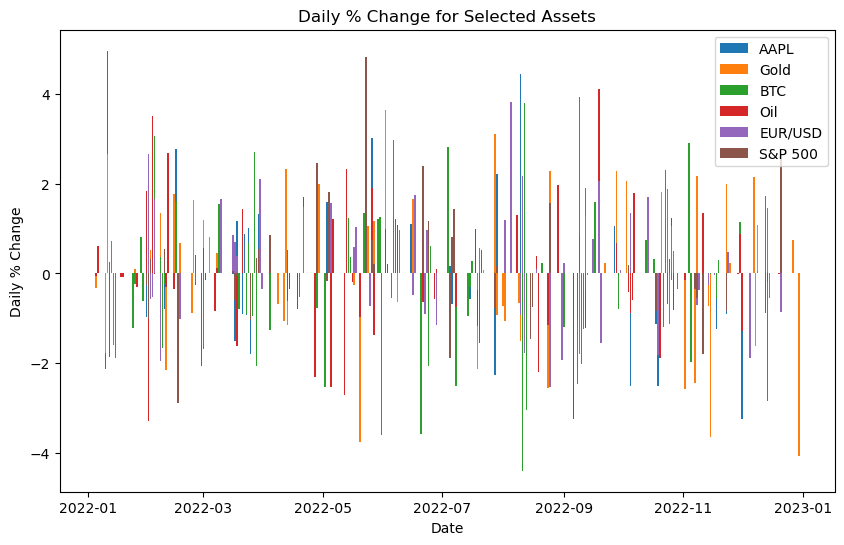

In [7]:
plt.figure(figsize=(10, 6))

plt.bar(aapl_daily_return.index, aapl_daily_return.values, label='AAPL')
plt.bar(gold_daily_return.index, gold_daily_return.values, label='Gold')
plt.bar(btc_daily_return.index, btc_daily_return.values, label='BTC')
plt.bar(oil_daily_return.index, oil_daily_return.values, label='Oil')
plt.bar(eurusd_daily_return.index, eurusd_daily_return.values, label='EUR/USD')
plt.bar(spy_daily_return.index, spy_daily_return.values, label='S&P 500')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.title('Daily % Change for Selected Assets')

plt.show()


In [8]:

#By adding 1e-9 (a small constant value) to the denominator
#ensure that the division doesn't result in infinity or undefined values.
aapl_daily_return = np.log(aapl['Close']).diff() / np.log(aapl['Close']).shift(1) + 1e-9
gold_daily_return = np.log(gold['Close']).diff() / np.log(gold['Close']).shift(1) + 1e-9




print('AAPL daily return:')
print(f"Mean: {aapl_daily_return.mean()}")
print(f"Standard Deviation: {aapl_daily_return.std()}")
print(f"Variance: {aapl_daily_return.var()}")
print(f"Min: {aapl_daily_return.min()}")
print(f"Max: {aapl_daily_return.max()}")

print('\nGold daily return:')
print(f"Mean: {gold_daily_return.mean()}")
print(f"Standard Deviation: {gold_daily_return.std()}")
print(f"Variance: {gold_daily_return.var()}")
print(f"Min: {gold_daily_return.min()}")
print(f"Max: {gold_daily_return.max()}")

print('\nBTC daily return:')
print(f"Mean: {btc_daily_return.mean()}")
print(f"Standard Deviation: {btc_daily_return.std()}")
print(f"Variance: {btc_daily_return.var()}")
print(f"Min: {btc_daily_return.min()}")
print(f"Max: {btc_daily_return.max()}")

print('\nOil daily return:')
print(f"Mean: {oil_daily_return.mean()}")
print(f"Standard Deviation: {oil_daily_return.std()}")
print(f"Variance: {oil_daily_return.var()}")
print(f"Min: {oil_daily_return.min()}")
print(f"Max: {oil_daily_return.max()}")

print('\nEUR/USD daily return:')
print(f"Mean: {eurusd_daily_return.mean()}")
print(f"Standard Deviation: {eurusd_daily_return.std()}")
print(f"Variance: {eurusd_daily_return.var()}")
print(f"Min: {eurusd_daily_return.min()}")
print(f"Max: {eurusd_daily_return.max()}")

print('\nS&P 500 daily return:')
print(f"Mean: {spy_daily_return.mean()}")
print(f"Standard Deviation: {spy_daily_return.std()}")
print(f"Variance: {spy_daily_return.var()}")
print(f"Min: {spy_daily_return.min()}")
print(f"Max: {spy_daily_return.max()}")


AAPL daily return:
Mean: -0.00025785486626892423
Standard Deviation: 0.004472788971181697
Variance: 2.000584118072462e-05
Min: -0.011865594935996133
Max: 0.017379911799848928

Gold daily return:
Mean: 6.8228850405139545e-06
Standard Deviation: 0.0012983161976342374
Variance: 1.6856249490394243e-06
Min: -0.0035333225771935054
Max: 0.004162060482192022

BTC daily return:
Mean: -0.10072287730711382
Standard Deviation: 1.7143314774485916
Variance: 2.938932414571071
Min: -4.405611161752457
Max: 3.9476440248983455

Oil daily return:
Mean: 0.03950871369317857
Standard Deviation: 1.45697719793929
Variance: 2.122782555315025
Min: -3.2962070692426444
Max: 4.126807687761786

EUR/USD daily return:
Mean: 0.19534102300221445
Standard Deviation: 1.3325765567424188
Variance: 1.7757602795794811
Min: -2.5328938006651915
Max: 3.829004119698661

S&P 500 daily return:
Mean: 0.12160592242249332
Standard Deviation: 1.3743429830557246
Variance: 1.8888186350745078
Min: -2.8843633263181614
Max: 4.84391954989649

## Regression Analysis

### Regression Analysis

- Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. Y should be % change S&P 500. X should be % change for each asset.
- For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.
- Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.
Which asset is highly correlated with the S&P 500 and which asset is the least correlated?


AAPL Regression Analysis:


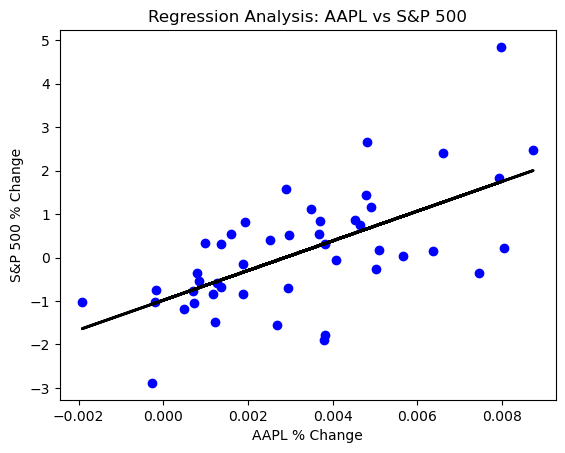

Intercept: [-0.98207366]
Coefficient: [[341.37117382]]
Mean squared error: 1.1111763757100257
Coefficient of determination: 0.39863512411061586

Gold Regression Analysis:


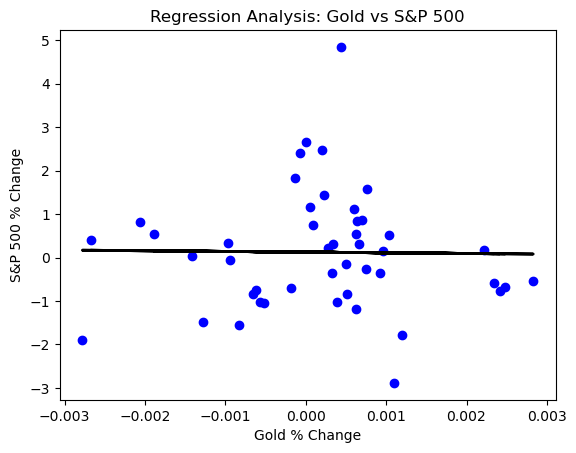

Intercept: [0.12454064]
Coefficient: [[-15.66120471]]
Mean squared error: 1.8473865992005978
Coefficient of determination: 0.00020065469975838468

BTC Regression Analysis:


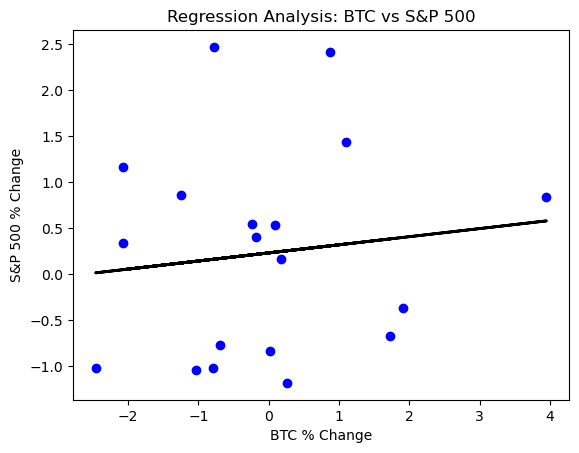

Intercept: [0.23241733]
Coefficient: [[0.08797632]]
Mean squared error: 1.1975046461913568
Coefficient of determination: 0.014496796526091038

Oil Regression Analysis:


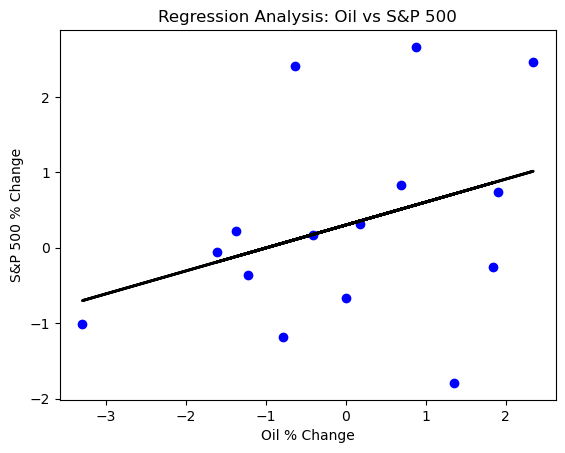

Intercept: [0.30223204]
Coefficient: [[0.3043141]]
Mean squared error: 1.4820707889363582
Coefficient of determination: 0.1229130227845614

EUR/USD Regression Analysis:


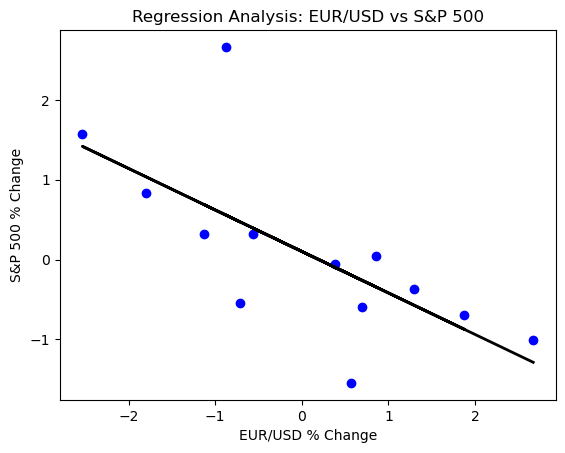

Intercept: [0.10161251]
Coefficient: [[-0.51982091]]
Mean squared error: 0.6096337674007153
Coefficient of determination: 0.4743569983998007

AAPL is the asset most correlated with the S&P 500.
EUR/USD is the asset least correlated with the S&P 500.


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def perform_regression_and_show_results(X, y, asset_name):
    # Drop any rows with NaN values
    X = X.dropna()
    y = y.dropna()
    
    # Ensure that X and y have the same index to avoid misalignment
    common_index = X.index.intersection(y.index)
    X = X.loc[common_index]
    y = y.loc[common_index]

    # Reshape the data
    X = X.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    # Create a Linear Regression object & fitting data to model
    regr = LinearRegression()
    regr.fit(X, y)

    # Make predictions using the model
    y_pred = regr.predict(X)

    # Plotting
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='black', linewidth=2)
    plt.xlabel(f'{asset_name} % Change')
    plt.ylabel('S&P 500 % Change')
    plt.title(f'Regression Analysis: {asset_name} vs S&P 500')
    plt.show()

    # Print the intercept/coefficient/ mean squared/coefficientofd
    print(f'Intercept: {regr.intercept_}')
    print(f'Coefficient: {regr.coef_}')
    print(f'Mean squared error: {mean_squared_error(y, y_pred)}')
    print(f'Coefficient of determination: {r2_score(y, y_pred)}')

# Assets
assets = {
    'AAPL': aapl_daily_return,
    'Gold': gold_daily_return,
    'BTC': btc_daily_return,
    'Oil': oil_daily_return,
    'EUR/USD': eurusd_daily_return
}

# Perform regression analysis for each asset
correlations = {}
for asset_name, asset in assets.items():
    print(f'\n{asset_name} Regression Analysis:')
    perform_regression_and_show_results(asset, spy_daily_return, asset_name)
    asset_aligned, spy_aligned = asset.align(spy_daily_return, join='inner')
    correlations[asset_name] = np.corrcoef(asset_aligned, spy_aligned)[0, 1]

# Find the asset most and least correlated with the S&P 500
most_correlated_asset = max(correlations, key=correlations.get)
least_correlated_asset = min(correlations, key=correlations.get)

print(f'\n{most_correlated_asset} is the asset most correlated with the S&P 500.')
print(f'{least_correlated_asset} is the asset least correlated with the S&P 500.')


